# Description:

The Boston Housing dataset contains information about various factors affecting housing prices in the Boston area. It includes features such as the per capita crime rate, average number of rooms per dwelling, proportion of residential land zoned for lots over 25,000 square feet, and more.

# Columns:

*   CRIM: per capita crime rate by town
*   ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS: proportion of non-retail business acres per town
*   CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX: nitric oxides concentration (parts per 10 million)
*   RM: average number of rooms per dwelling
*   AGE: proportion of owner-occupied units built prior to 1940
*   DIS: weighted distances to five Boston employment centres
*   RAD: index of accessibility to radial highways
*   TAX: full-value property-tax rate per (10,000 USD)
*   PTRATIO: pupil-teacher ratio by town
*   B: 1000(Bk - 0.63)^2 where Bk is the proportion of (people of African American descent) by town
*   LSTAT: % lower status of the population
*   MEDV: Median value of owner-occupied homes in $1000s (target variable)

In [42]:
# Importing the Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [43]:
# Import the data from a csv file into a pandas dataframe
housing = pd.read_csv('/content/Boston_Housing.csv')

In [44]:
# Taking a peek at the data
housing.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


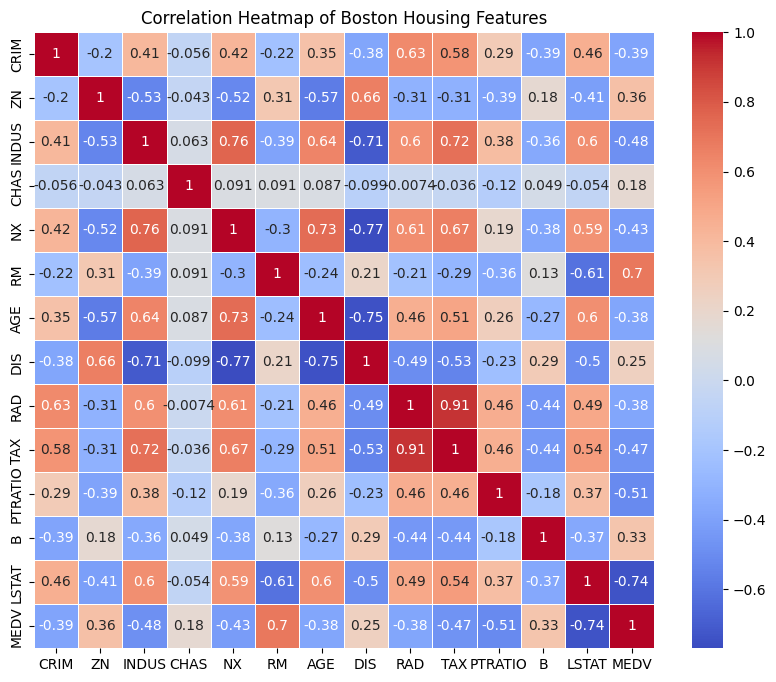

In [45]:
# Select only numerical columns
numeric_columns = housing.select_dtypes(include=['number'])

# Generating a Correlation Heatmap Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Boston Housing Features')
plt.show()

In [46]:
# How much data do we have?
housing.shape

(506, 14)

In [47]:
# How many values for the neighbourhood_group?
housing['RAD'].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [48]:
# How many values for the neighbourhood?
housing['ZN'].value_counts()

ZN
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

In [49]:
# How many values for the bedrooms?
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [50]:
# What data types do we have?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [51]:
# Do we have any missing values in our dataset?
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [52]:
#checking the distribution of the transmission
housing.CRIM.value_counts()

CRIM
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: count, Length: 504, dtype: int64

In [53]:
#checking the distribution of the transmission
housing.TAX.value_counts()

TAX
666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
285.0      1
198.0      1
256.0      1
244.0      1
313.0      1
Name: count, Length: 66, dtype: int64

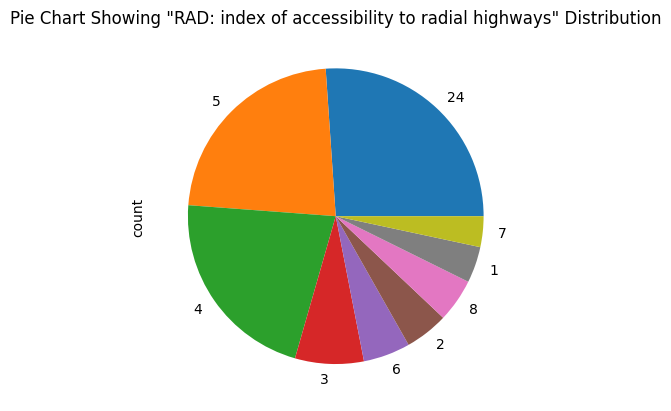

<Figure size 500x1000 with 0 Axes>

In [54]:
#plt the distribution of the RAD index
data = housing.RAD.value_counts()
data.plot.pie(title='Pie Chart Showing "RAD: index of accessibility to radial highways" Distribution')
plt.figure(figsize=(5,10))
plt.show()

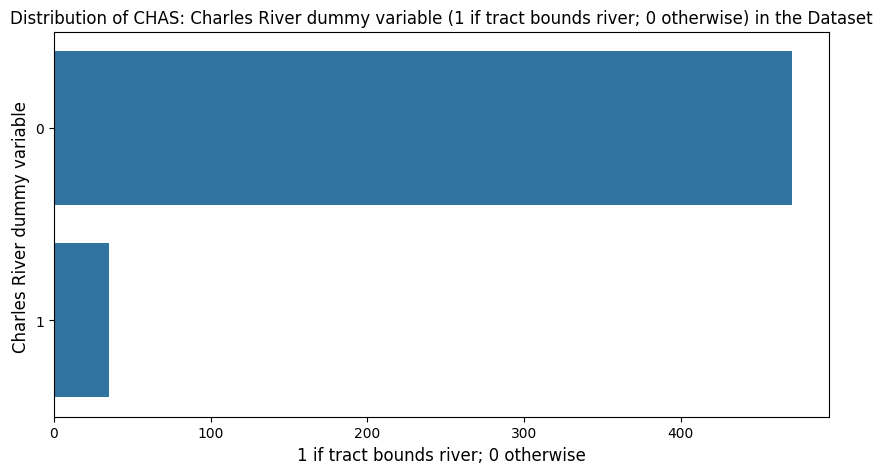

In [55]:
#plot the distribution of the CHAS
bedroom_count = housing['CHAS'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=bedroom_count.values, y = bedroom_count.index, alpha = 1, orient= 'h')
plt.title('Distribution of CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) in the Dataset')
plt.ylabel('Charles River dummy variable ', fontsize= 12)
plt.xlabel('1 if tract bounds river; 0 otherwise', fontsize = 12)
plt.show()

In [56]:
# Take another look at the dataset: We need to do one hot encoding for the categorial columns:
# name, host_name, neighbourhood_group, neighbourhood, room_type, bedrooms

housing

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [57]:
CHAS_encoding = pd.get_dummies(housing['CHAS'], dtype='int')
CHAS_encoding

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
501,1,0
502,1,0
503,1,0
504,1,0


Encodind categorical variables

In [58]:
# # Now, we can drop the original fuel type column from our dataset

# house = house.drop('CHAS', axis=1)
# house

In [59]:
# house = house.join(CHAS_encoding)
# house

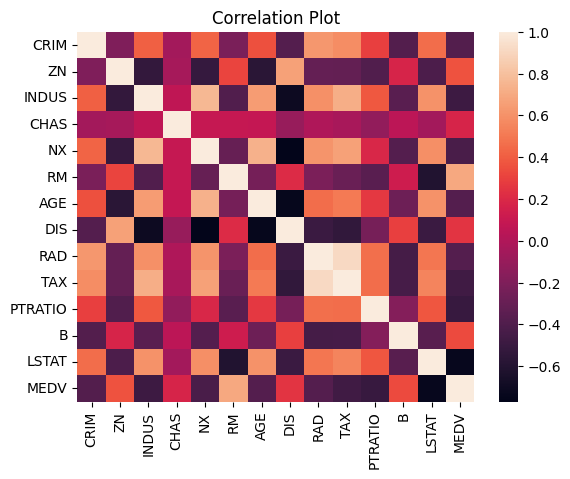

In [60]:
# Select only numerical columns
numeric_columns = housing.select_dtypes(include=['number'])

# Generating a Correlation Matrix
sns.heatmap(numeric_columns.corr())
plt.title('Correlation Plot')
plt.show()

Separting the features from the labels

In [61]:
# Split the Data
X = housing.drop(columns=['MEDV']) #features
y = housing['MEDV'] #target variable

In [62]:
X

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [63]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

Splitting the data into training and test sets in the ratio of 70:30

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=2)

In [65]:
# shape of spiltted data
print("The shape of X_train: ", X_train.shape)
print("The shape of X_test: ", X_test.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of y_test: ", y_test.shape)

The shape of X_train:  (354, 13)
The shape of X_test:  (152, 13)
The shape of y_train:  (354,)
The shape of y_test:  (152,)


Create the LR model and fit (train) on the training data

In [66]:
from sklearn.linear_model import LinearRegression

#Create the model
LR = LinearRegression()

#training or fitting the model to the data
LR.fit(X_train, y_train)

LinearRegression()

Making Predictions on the test data

In [67]:
y_pred = LR.predict(X_test)

Calculate the Coefficients

In [68]:
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [-9.32979504e-02  3.11368143e-02 -1.81754255e-02  3.19555762e+00
 -1.51042926e+01  3.50102142e+00  1.89769212e-02 -1.26552555e+00
  3.22156319e-01 -1.09456764e-02 -1.08963451e+00  1.25396786e-02
 -6.07618971e-01]


Calculating the intercept

In [69]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: 37.16254129502876


Calculate R-Squared

In [70]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.7330247212691915


Calculate Mean Squared Error

In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')

MSE: 23.038812866283674


Calculate the RMSE

In [72]:
rmse = mean_squared_error(y_test,y_pred, squared=False)
print(f'MSE: {rmse}')

MSE: 4.799876338644952


Calculate the Mean Absolute Error

In [73]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print(f'MAE: {mae}')

MAE: 3.3929547821818056


Exporting the model as a pickle

In [74]:
import pickle

with open('boston_housing_prediction_model.pkl', 'wb') as f:
  pickle.dump(LR, f)